# General Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
import sympy as sm
from IPython.display import display, Math
import os
import math

# Data

In [2]:
# Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

In [3]:
#definir le systeme d'equations differentiels
def model_rel(t, X, params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    Ms = 30000
    Fs = 30000
    L = X[0] #larves
    M = X[1] #Males fertilisées
    V = X[2] #femelles vierges
    F = X[3] #females mated with wild males
    
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    if Ms == 0 and Fs == 0:
        V_dot = (1-m)*vL*L - (uF+vF*min((lamda*M/V),1))*V
        F_dot = vF*min((lamda*M/V),1)*V - (uF)*F
        return np.array([L_dot,M_dot,V_dot,F_dot])
    if Ms != 0 and Fs ==  0:
        S = X[4] #females mated with steriles
        V_dot = (1-m)*vL*L - (uF+vF)*V
        F_dot = vF*M/(M+Ms)*V - (uF)*F
        S_dot = vF*Ms/(M+Ms)*V - (uF)*S
        #vecteurs
        return np.array([L_dot,M_dot,V_dot,F_dot,S_dot])
    if Ms != 0 and Fs != 0:
        S = X[4] #females mated with steriles
        #Ms_dot= Ms -uM*Ms  #sterile Males
        #Fs_dot= Fs -uF*Fs #sterile females
        #Ss=X[5]
        #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF*(M/(M+Ms)*V/(V+Fs)+Ms/(M+Ms)*V/(V+Fs)))*V
        F_dot = vF*M/(M+Ms)*V/(V+Fs)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V/(V+Fs)*V - (uF+gamma)*S
        #if (M + Ms) != 0 and (V + Fs) != 0:
        #    Fs_dot= Fs + alpha*Ss-(uF+vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs)))*Fs
        #    Ss_dot = vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs))*Fs-(uF+alpha)*Ss
        #else:
        #    Fs_dot = 0
        #    Ss_dot = 0
        return np.array([L_dot, M_dot, V_dot, F_dot, S_dot])#, Ss_dot#, Ms_dot ,  Fs_dot, Ss_dot ])
    

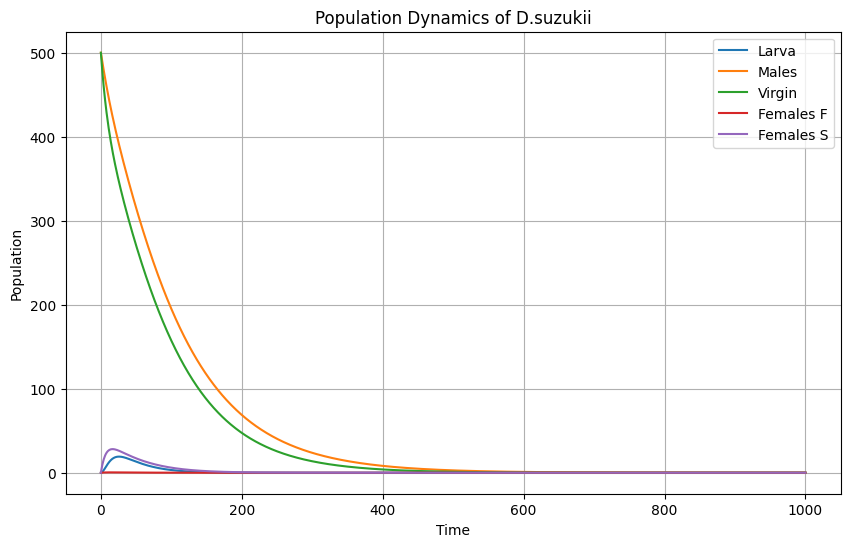

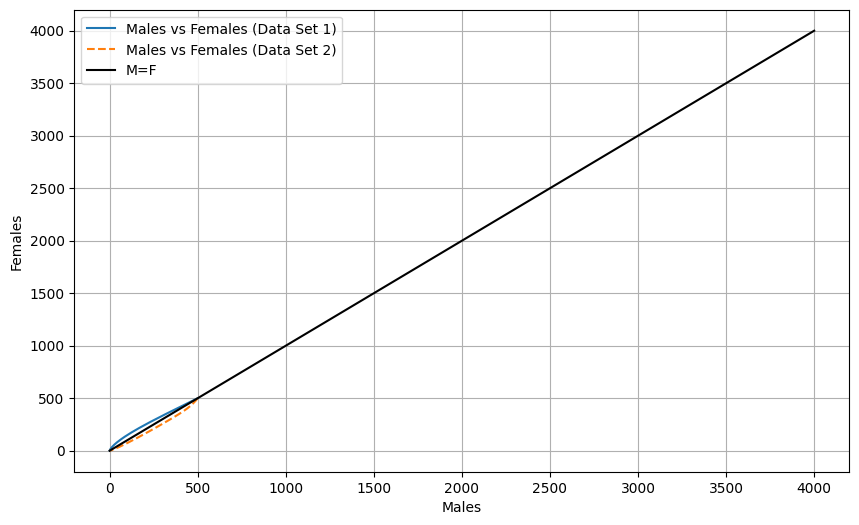

In [4]:
# Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

# Initial conditions
L0 = 0
M0 = 500
F0 = 0
V0 = 500
S0 = 0

# Time span for integration
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
t = np.linspace(t_span[0], 4000, 1000)

# Initial state vector
initial_state = np.array([L0, M0, V0, F0, S0])

# Solve the ODEs for the first set of parameters
solution1 = solve_ivp(model_rel, t_span, initial_state, args=(params1,), t_eval=t_eval)

# Solve the ODEs for the second set of parameters
solution2 = solve_ivp(model_rel, t_span, initial_state, args=(params2,), t_eval=t_eval)

# Plot the solutions for both parameter sets
plt.figure(figsize=(10, 6))
plt.plot(solution1.t, solution1.y[0], label='Larva (Data Set 1)')
plt.plot(solution1.t, solution1.y[1], label='Males (Data Set 1)')
plt.plot(solution1.t, solution1.y[2], label='Virgin (Data Set 1)')
plt.plot(solution1.t, solution1.y[3], label='Females F (Data Set 1)')
plt.plot(solution1.t, solution1.y[4], label='Females S (Data Set 1)')
plt.plot(solution2.t, solution2.y[0], label='Larva')# (Data Set 2)')#linestyle='dashed', 
plt.plot(solution2.t, solution2.y[1], label='Males')# (Data Set 2)')#linestyle='dashed', 
plt.plot(solution2.t, solution2.y[2], label='Virgin')# (Data Set 2)')#)# linestyle='dashed',
plt.plot(solution2.t, solution2.y[3], label='Females F') #(Data Set 2)') linestyle='dashed', 
plt.plot(solution2.t, solution2.y[4], label='Females S') #linestyle='dashed',
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of D.suzukii')
plt.legend()
plt.grid()

# Plot the population dynamics over time
plt.figure(figsize=(10, 6))
plt.plot(solution1.y[1], solution1.y[2], label='Males vs Females (Data Set 1)')
plt.plot(solution2.y[1], solution2.y[2], linestyle='dashed', label='Males vs Females (Data Set 2)')           

        # Plot the line x=y
plt.plot(t, t, 'k-', label='M=F')
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
#fig.suptitle("Males vs Females numbers")
plt.xlabel('Males')
plt.ylabel('Females')
plt.grid()
plt.legend(loc='best')

In [5]:

K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4)
print((b * (1 - m) * vL * vF) / ((uL + vL) * ((vF + uF) * (delta + uF) - delta * vF)))#eta_03
print((b * (m) * vL * vF*lamda) / (uM * ((vF + uF) * (delta + uF))))#eta_04



17.465038873295416
63.413149350649356


In [6]:
K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4)
print(((1-m) * vL*vF * b) / (uF * (uL + vL)*(uF + vF)))
K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params2
print(((1-m) * vL*vF * b) / (uF * (uL + vL)*(uF + vF)))

19.804106579540335
161.85122090069146


# Males Release

In [7]:


def inter(param):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param
######
# Calculations based on the parameters
    eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL)*(uF + vF))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Generate L values
#L_values = np.linspace(0, 100, 1000)
    
    Ms=5000
    L0=0
    L_max=K*(1-(1/eta0))

    Ln = np.array(np.arange(-250, L_max, 0.1))  # Discretization of L values
    Males = np.array([(-(eta0 / K) * L**2 + (eta0 + (delta*vF) / (uF * (uF + vF)) - (uF+delta)/uF) * L )/((m*vL/uM) * ((uF+delta)/uF-(((uF+delta)*gamma*vF)/(uF*(uF+gamma)*(uF+vF))))) for L in Ln])  # Values of MS along the parabola
#Females_prime=np.array([(-(eta0 / K) * m * (1 - m) * vL**2 * (L**2) * 3 + m * (1 - m) * vL**2 * (eta0 - 1) * L*2 - (Ms * uM * (1 - m) * vL + Fs * uF * m * vL) )/(uM*Ms*uF) for L in Ln])
    #Males = np.real(Males)
    complex_indices = np.where(np.iscomplex(Males))

# Extract and print the complex values
    complex_values = Males[complex_indices]
    print(complex_values)
    term1=-(eta0 / K) 
    term2= (eta0+delta*vF/(uF*(uF+vF))-(uF+delta)/uF)
    term3= - (uM*Ms/(m*vL)) * ((uF+delta)/uF-(((uF+delta)*gamma*vF)/(uF*(uF+gamma)*(uF+vF))))
#term4=-Ms * Fs * uM * uF 
    roots = np.roots([term1, term2, term3])
    print(roots)
# Find intersection indices
    intersection_indices = np.where(Males == Ms)[0]

# Extract corresponding L values
    intersection_L_values = Ln[intersection_indices]
    Ln_another = np.zeros_like(Ln)
# Plot the curves
    plt.plot(Ln, Males, color='green', label='Zeta(L)')
    plt.axhline(Ms, color='red', label='Ms')
    plt.grid(True)
    plt.legend()
    plt.title("intersection of Larva eqiulibrium points curve with the one of the males release complex model")
    plt.show()

    name= 'intersection of Larva eqiulbrium points curve with the one of the males release complex model'
    #plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
# Plot the deriviative of the curve zeta1

#plt.plot(Ln, Females_prime, color='green', label='Zeta^*(L)')
#plt.plot(Ln, Ln_another, color='red', label='zeros')
#plt.grid(True)
#plt.legend()
# Highlight the intersection points
#plt.scatter(intersection_L_values, np.full_like(intersection_L_values, Fs), color='blue', marker='*')

# Add a title


    plt.show()

[]
[471.37137778+764.19305544j 471.37137778-764.19305544j]


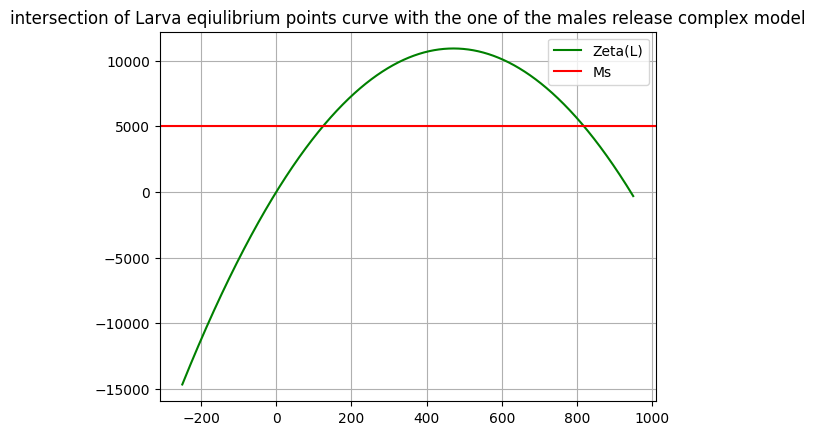

In [8]:
inter(params1)


In [25]:


def inter(param, L_max, num, S, s, ss):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param
######
# Calculations based on the parameters
    eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL)*(uF + vF))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Generate L values
#L_values = np.linspace(0, 100, 1000)
    
    Ms_values = np.linspace(0, L_max, 100)

# Calculate the roots for each Ms value
    real_roots = []
    for Ms in Ms_values:
        term1 = -(eta0 / K)
        term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
        term3 = - (uM * Ms / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
        roots = np.roots([term1, term2, term3])
        real_roots.append(np.real(roots))

    Ln_another = np.zeros_like(real_roots)
    # Add a vertical line in red
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    Ms = [s, s]
    inter = np.roots([term1, term2, term3])
    print(inter)
    Fs =[ss, ss]
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * ss / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    inter2 = np.roots([term1, term2, term3])
    print(inter2)

# Plot the real roots
    plt.figure()
    plt.plot(real_roots[:num], Ms_values[:num], '-',color ='green')
    plt.axhline(y= S, color='grey', linestyle='--')#, label='Vertical Line')
    plt.axhline(y= s, color='orange', linestyle='--')#, label='Vertical Line')
    plt.axhline(y= ss, color='red', linestyle='-')#, label='Vertical Line')
    plt.scatter(inter, Ms, color='blue', marker='o')
    plt.scatter(inter2, Fs, color='blue', marker='o')
    plt.annotate(r' Ms*', (2, s), 
                textcoords="offset points", xytext=(0,10), ha='center', color='red', fontsize=10,
                arrowprops=dict(arrowstyle="->", color='red'))
    #plt.plot(Ln_another, Ms_values, '-', color='blue')
    plt.ylabel('Ms')
    plt.xlabel('L')
    plt.title('Real Roots of the equation in function of Ms')
    plt.legend()

    plt.grid()

    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[496.45593584+375.84329316j 496.45593584-375.84329316j]
[798.74358914 194.16828255]


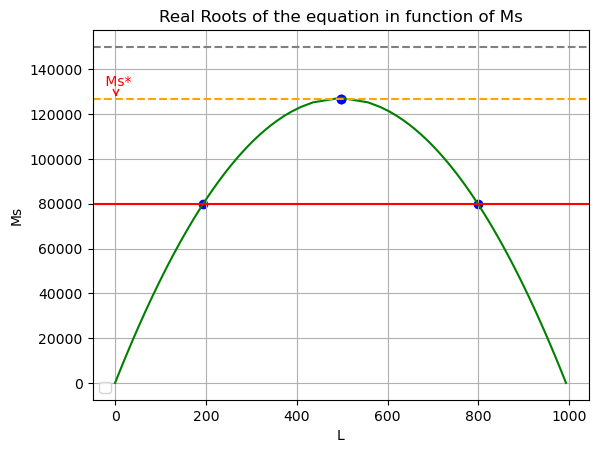

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[471.37137778+140.22704712j 471.37137778-140.22704712j]
[776.66116716 166.08158839]


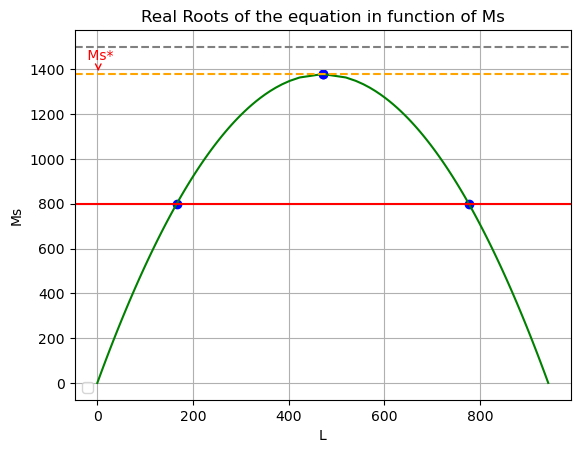

In [26]:
inter(params2, 200000, 64, 150000, 126600, 80000)
inter(params1, 1500, 92, 1500, 1380, 800)

# Bifurcation

In [203]:
import sympy as sm

def bifurcation(param, max):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param 
    eta0 = ((1-m) * vL*vF * b) / (((uF+vF) * (uL + vL))*uF)
# Generate Ms values
    Ms_values = np.linspace(0, max, 1000)
    Ms_value = []
    l_values = []
    stable_points = []
    unstable_points = []
    solution=[]
    colors=[]
# Calculate the roots for each Ms value
    for Ms in Ms_values:
        term1 = -(eta0 / K)
        term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
        term3 = - (uM * Ms / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
        roots = np.roots([term1, term2, term3])
        real_roots = [root for root in roots if np.isreal(root)]

        if len(real_roots) == 0:
            break  # Exit the loop if there are no real roots
        if Ms == 0:
            l = np.zeros(2)
            if real_roots[0]<real_roots[1]:
                l[0] = real_roots[0]
                l[1] = real_roots[1]
        
            else:
                l = real_roots
            Ms_value.append(Ms)
            Ms_value.append(Ms)
            colors.append('green')
            colors.append('green')
            l=np.array(l)
            l_values.append(l)
        else:
            l = np.zeros(3)
            if real_roots[0]<real_roots[1]:
                l[1] = real_roots[0]
                l[2] = real_roots[1]
            else:
                l[1] = real_roots[1]
                l[2] = real_roots[0]
            Ms_value.append(Ms)
            Ms_value.append(Ms)
            Ms_value.append(Ms)
            colors.append('green')
            colors.append('orange')
            colors.append('green')
            l=np.array(l)
            l_values.append(l)

            for i in l:
                if i == 0:
                    solution.append([0, 0, 0, 0, 0])
                
                else:
                    M = m * vL * i / uM
                    F = (uL + vL) * i / (b * (1 - i / K))
                    S = (Ms * (uF + delta)) / (M * (uF + delta)) * F
                    V = (uF + delta) / (vF) * ((M + Ms) / M) * F
                    solution.append([i, M, V, F, S])
        #print(solution)
    l_values=np.concatenate(l_values)
# Associate roots with equilibrium points and determine stability
 
    for i in range(len(colors)):
        plt.scatter(Ms_value[i], l_values[i], color=colors[i])
    plt.grid()
    plt.xlabel('Ms')
    plt.ylabel('Larva equilibrium points')
    plt.title('The Bifurcation Curve')

# Create a custom legend
    legend_labels = ['Stable', 'Unstable']
    legend_colors = ['green', 'orange']
    legend_markers = ['o', 'o']
    legend_elements = [plt.Line2D([0], [0], marker=marker, color='w', label=label, markerfacecolor=color, markersize=8)
                      for marker, color, label in zip(legend_markers, legend_colors, legend_labels)]

# Add the legend
    plt.legend(handles=legend_elements)

# Display the plot
    plt.show()

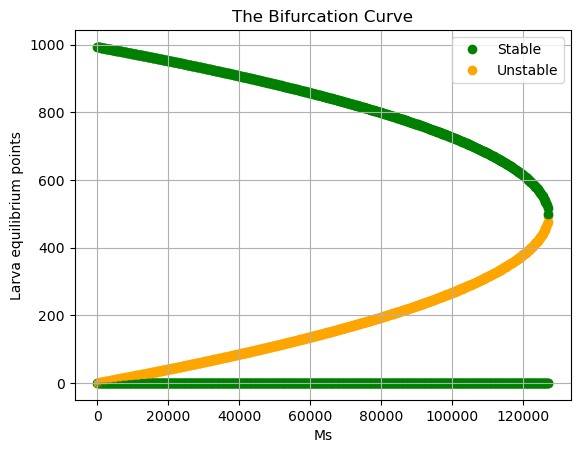

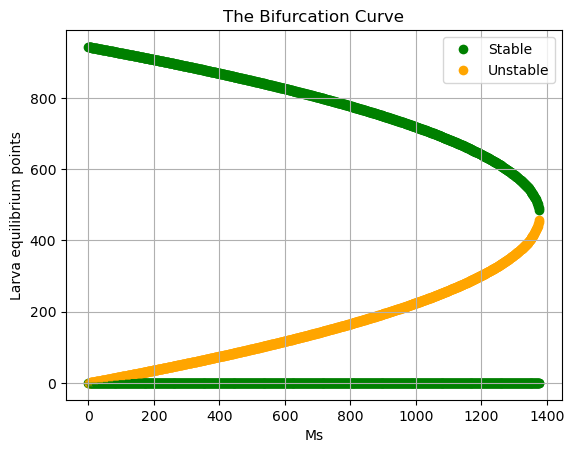

In [204]:
bifurcation(params2, 200000)
bifurcation(params1, 1500)

# Females releases

It is gonna take forever to get the equilbrium points this way

In [1]:
from sympy import symbols, Eq, solve

# Define symbols
L, M, V, S, F= symbols('L M V S F')

# Define parameters
beta, K, m, v_L, v_F, mu_L, mu_M, mu_F, gamma, delta = (9, 1000, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, alpha
Ms = 5000
Fs = 5000
# Define equations
equations = [
    Eq(beta * (1 - L / K) * F - (mu_L + v_L) * L, 0),
    Eq(v_L * m * L - mu_M * M, 0),
    Eq(v_L * (1 - m) * L - (mu_F + v_F * (Ms / (M + Ms) * (V / (V + Fs)) + M / (M + Ms) * (V / (V + Fs)))) * V, 0),
    Eq(v_F * (Ms / (M + Ms)) * (V / (V + Fs)) * V - (mu_F + gamma) * S, 0),
    Eq(v_F * (M / (M + Ms)) * (V / (V + Fs)) * V - (mu_F + delta) * F, 0)
]

# Solve for equilibrium points
equilibrium_points = solve(equations, (L, M, V, S, F))
print("Equilibrium Points:")
for point in equilibrium_points:
    print(point)


: 

# Without remating ability model

In [31]:
#definir le systeme d'equations differentiels
def model_rel(t, X, params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    Ms = 15000
    Fs = 15000
    L = X[0] #larves
    M = X[1] #Males fertilisées
    V = X[2] #femelles vierges
    F = X[3] #females mated with wild males
    
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    if Ms == 0 and Fs == 0:
        V_dot = (1-m)*vL*L + delta*F - (uF+vF*min((lamda*M/V),1))*V
        F_dot = vF*min((lamda*M/V),1)*V - (uF+delta)*F
        return np.array([L_dot,M_dot,V_dot,F_dot])
    if Ms != 0 and Fs ==  0:
        S = X[4] #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF)*V
        F_dot = vF*M/(M+Ms)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V - (uF+gamma)*S
        #vecteurs
        return np.array([L_dot,M_dot,V_dot,F_dot,S_dot])
    if Ms != 0 and Fs != 0:
        S = X[4] #females mated with steriles
        #Ms_dot= Ms -uM*Ms  #sterile Males
        #Fs_dot= Fs -uF*Fs #sterile females
        #Ss=X[5]
        #females mated with steriles
        V_dot = (1-m)*vL*L - (uF+vF*(M/(M+Ms)*V/(V+Fs)+Ms/(M+Ms)*V/(V+Fs)))*V
        F_dot = vF*M/(M+Ms)*V/(V+Fs)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V/(V+Fs)*V - (uF+gamma)*S
        #if (M + Ms) != 0 and (V + Fs) != 0:
        #    Fs_dot= Fs + alpha*Ss-(uF+vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs)))*Fs
        #    Ss_dot = vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs))*Fs-(uF+alpha)*Ss
        #else:
        #    Fs_dot = 0
        #    Ss_dot = 0
        return np.array([L_dot, M_dot, V_dot, F_dot, S_dot])#, Ss_dot#, Ms_dot ,  Fs_dot, Ss_dot ])
    

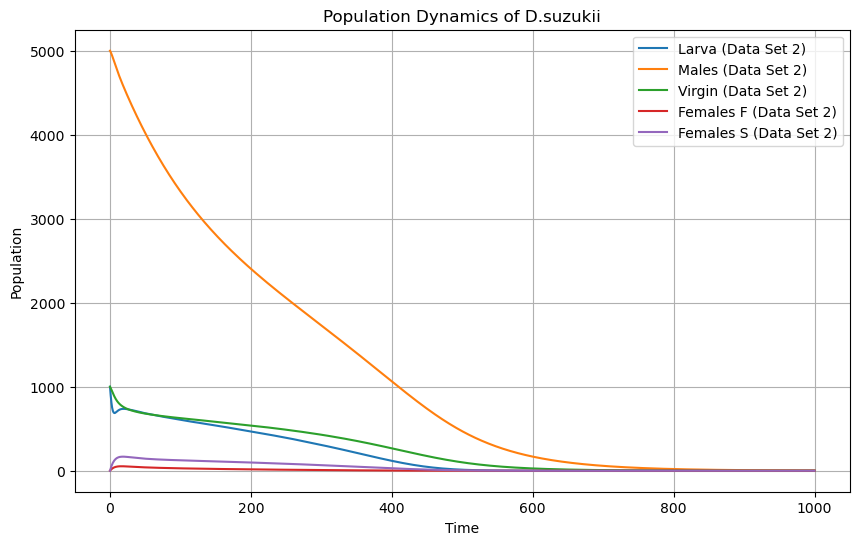

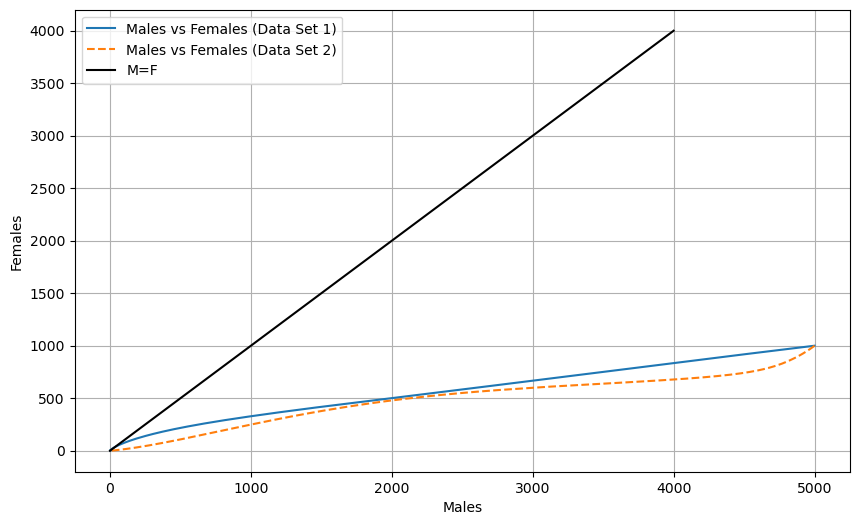

In [33]:
#Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

# Initial conditions
L0 = 1000
M0 = 5000
F0 = 0
V0 = 1000
S0 = 0

# Time span for integration
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
t = np.linspace(t_span[0], 4000, 1000)

# Initial state vector
initial_state = np.array([L0, M0, V0, F0, S0])

# Solve the ODEs for the first set of parameters
solution1 = solve_ivp(model_rel, t_span, initial_state, args=(params1,), t_eval=t_eval)

# Solve the ODEs for the second set of parameters
solution2 = solve_ivp(model_rel, t_span, initial_state, args=(params2,), t_eval=t_eval)

# Plot the solutions for both parameter sets
plt.figure(figsize=(10, 6))
#plt.plot(solution1.t, solution1.y[0], label='Larva (Data Set 1)')
#plt.plot(solution1.t, solution1.y[1], label='Males (Data Set 1)')
#plt.plot(solution1.t, solution1.y[2], label='Virgin (Data Set 1)')
#plt.plot(solution1.t, solution1.y[3], label='Females F (Data Set 1)')
#plt.plot(solution1.t, solution1.y[4], label='Females S (Data Set 1)')
plt.plot(solution2.t, solution2.y[0],  label='Larva (Data Set 2)')#linestyle='dashed',
plt.plot(solution2.t, solution2.y[1],  label='Males (Data Set 2)')#linestyle='dashed',
plt.plot(solution2.t, solution2.y[2],  label='Virgin (Data Set 2)')#linestyle='dashed',
plt.plot(solution2.t, solution2.y[3],  label='Females F (Data Set 2)')#linestyle='dashed',
plt.plot(solution2.t, solution2.y[4],  label='Females S (Data Set 2)')#linestyle='dashed',
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of D.suzukii')
plt.legend()
plt.grid()

# Plot the population dynamics over time
plt.figure(figsize=(10, 6))
plt.plot(solution1.y[1], solution1.y[2], label='Males vs Females (Data Set 1)')
plt.plot(solution2.y[1], solution2.y[2], linestyle='dashed', label='Males vs Females (Data Set 2)')           

        # Plot the line x=y
plt.plot(t, t, 'k-', label='M=F')
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
#fig.suptitle("Males vs Females numbers")
plt.xlabel('Males')
plt.ylabel('Females')
plt.grid()
plt.legend(loc='best')

# Preferences with remating ability

In [34]:
#definir le systeme d'equations differentiels
def model_rel(t, X, params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    Bfm = 0.75
    Bfsm = 0.75
    Bmf = 0.75
    Bmsf = 0.75
    Bfms = 1- Bfm
    Bfsms = 1- Bfsm
    Bmfs = 1- Bmf
    Bmsfs = 1- Bmsf
    #number of males
    Ms = 15000
    Fs = 15000
    L = X[0] #larves
    M = X[1] #Males fertilisées
    V = X[2] #femelles vierges
    F = X[3] #females mated with wild males
    
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    if Ms == 0 and Fs == 0:
        V_dot = (1-m)*vL*L + delta*F - (uF+vF*min((lamda*M/V),1))*V
        F_dot = vF*min((lamda*M/V),1)*V - (uF+delta)*F
        return np.array([L_dot,M_dot,V_dot,F_dot])
    if Ms != 0 and Fs ==  0:
        S = X[4] #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF)*V
        F_dot = vF*M/(M+Ms)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V - (uF+gamma)*S
        #vecteurs
        return np.array([L_dot,M_dot,V_dot,F_dot,S_dot])
    if Ms != 0 and Fs != 0:
        S = X[4] #females mated with steriles
        #Ms_dot= Ms -uM*Ms  #sterile Males
        #Fs_dot= Fs -uF*Fs #sterile females
        #Ss=X[5]
        #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF*((0.75*0.75*M*V)/(0.75*0.75*M*V+0.75*0.25*Ms*V+0.25*0.75*Fs*M+0.25*0.25*Ms*Fs)+(0.75*0.25*Ms*V)/(0.75*0.75*M*V+0.75*0.25*Ms*V+0.25*0.75*Fs*M+0.25*0.25*Ms*Fs)))*V
        F_dot = vF*((0.75*0.75*M*V)/(0.75*0.75*M*V+0.75*0.25*Ms*V+0.25*0.75*Fs*M+0.25*0.25*Ms*Fs))*V - (uF+delta)*F
        S_dot = vF*((0.75*0.25*Ms*V)/(0.75*0.75*M*V+0.75*0.25*Ms*V+0.25*0.75*Fs*M+0.25*0.25*Ms*Fs))*V - (uF+gamma)*S
        #if (M + Ms) != 0 and (V + Fs) != 0:
        #    Fs_dot= Fs + alpha*Ss-(uF+vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs)))*Fs
        #    Ss_dot = vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs))*Fs-(uF+alpha)*Ss
        #else:
        #    Fs_dot = 0
        #    Ss_dot = 0
        return np.array([L_dot, M_dot, V_dot, F_dot, S_dot])#, Ss_dot#, Ms_dot ,  Fs_dot, Ss_dot ])
    

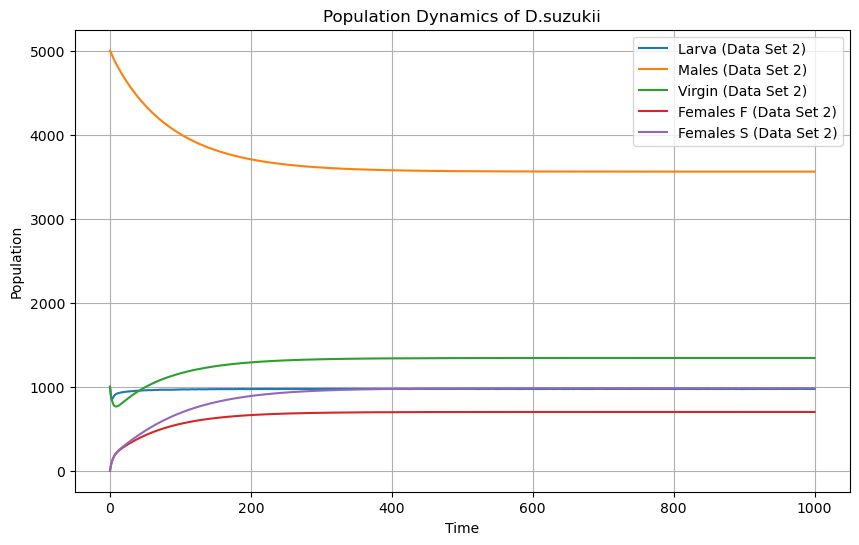

In [35]:
#Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

# Initial conditions
L0 = 1000
M0 = 5000
F0 = 0
V0 = 1000
S0 = 0

# Time span for integration
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial state vector
initial_state = np.array([L0, M0, V0, F0, S0])

# Solve the ODEs for the first set of parameters
solution1 = solve_ivp(model_rel, t_span, initial_state, args=(params1,), t_eval=t_eval)

# Solve the ODEs for the second set of parameters
solution2 = solve_ivp(model_rel, t_span, initial_state, args=(params2,), t_eval=t_eval)

# Plot the solutions for both parameter sets
plt.figure(figsize=(10, 6))
#plt.plot(solution1.t, solution1.y[0], linestyle='dashed', label='Larva (Data Set 1)')
#plt.plot(solution1.t, solution1.y[1], linestyle='dashed', label='Males (Data Set 1)')
#plt.plot(solution1.t, solution1.y[2], linestyle='dashed', label='Virgin (Data Set 1)')
#plt.plot(solution1.t, solution1.y[3], linestyle='dashed', label='Females F (Data Set 1)')
#plt.plot(solution1.t, solution1.y[4], linestyle='dashed', label='Females S (Data Set 1)')
plt.plot(solution2.t, solution2.y[0], label='Larva (Data Set 2)')
plt.plot(solution2.t, solution2.y[1], label='Males (Data Set 2)')
plt.plot(solution2.t, solution2.y[2], label='Virgin (Data Set 2)')
plt.plot(solution2.t, solution2.y[3], label='Females F (Data Set 2)')
plt.plot(solution2.t, solution2.y[4], label='Females S (Data Set 2)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of D.suzukii')
plt.legend()
plt.grid()

# Plot the population dynamics over time
#plt.figure(figsize=(10, 6))
#plt.plot(solution1.y[1], solution1.y[2], label='Males vs Females (Data Set 1)')
#plt.plot(solution2.y[1], solution2.y[2], linestyle='dashed', label='Males vs Females (Data Set 2)')           

        # Plot the line x=y
#plt.plot(t, t, 'k-', label='M=F')
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
#fig.suptitle("Males vs Females numbers")
#plt.xlabel('Males')
#plt.ylabel('Females')
#plt.grid()
#plt.legend(loc='best')